In [99]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

data=pd.read_csv('../input/heartdisease-2/heart_disease.csv')
labels=data.values[:,-1]
labels[labels>1]=1
labels=labels.astype(int)

data=data.values[:,:-1]

In [100]:
data = (data - np.mean(data, axis=0))/np.std(data, axis=0)
print(data)

[[ 0.94872647  0.68620244 -2.25177456 ...  2.27457861 -0.71113139
   0.65913253]
 [ 1.39200191  0.68620244  0.87798549 ...  0.64911323  2.5048807
  -0.86542592]
 [ 1.39200191  0.68620244  0.87798549 ...  0.64911323  1.43287667
   1.16731868]
 ...
 [ 0.28381332  0.68620244  0.87798549 ...  0.64911323  0.36087264
   1.16731868]
 [ 0.28381332 -1.4572959  -1.20852121 ...  0.64911323  0.36087264
  -0.86542592]
 [-1.82174501  0.68620244 -0.16526786 ... -0.97635214 -0.71113139
  -0.86542592]]


In [101]:
def poly_transform(data):
    data_trans = np.empty((data.shape[0],105))
    it = 0
    for row in data:
        result = []
        result.append(1)
        for element in row:
            result.append(element)
        
        for i in range(len(row)):
            for j in range(len(row)):
                res=row[i]*row[j]
                if res not in result:
                    result.append(res)
        data_trans[it,:] = result
        it += 1
    return data_trans

In [102]:
poly_data = poly_transform(data)
print(poly_data)

[[ 1.          0.94872647  0.68620244 ...  0.50570785 -0.46872983
   0.4344557 ]
 [ 1.          1.39200191  0.68620244 ...  6.27442734 -2.16778869
   0.74896203]
 [ 1.          1.39200191  0.68620244 ...  2.05313556  1.67262371
   1.36263291]
 ...
 [ 1.          0.28381332  0.68620244 ...  0.13022906  0.42125338
   1.36263291]
 [ 1.          0.28381332 -1.4572959  ...  0.13022906 -0.31230854
   0.74896203]
 [ 1.         -1.82174501  0.68620244 ...  0.50570785  0.61543154
   0.74896203]]


In [103]:
data = np.column_stack((data, np.ones(data.shape[0])))

In [104]:
class LogisticRegression():
    def __init__(self):
        self.w_hat = None
    def fit(self,data,labels,max_iterations=500):
        #TODO
        self.w_hat = np.random.randn(data.shape[1])
        alpha = 0.01
        for it in range(max_iterations):
            labels_hat = self.predict(data)
            self.w_hat = self.w_hat - alpha*(self.error_gradient(data, labels, labels_hat))
        #pass

    def sigmoid(self,data):
        #TODO
        return 1.0/(1 + np.exp(-(data)))
        #pass
    def binary_cross_entropy(self,true,prediction):
        #TODO
        loss = -np.mean(true * np.log(prediction) + (1-true) * np.log(1-prediction))
        return loss
        #pass
    def error_gradient(self,data,true,prediction):
        #TODO
        return (prediction - true) @ data
        #pass
    def predict(self,data,w_hat=None):
        #TODO
        if w_hat == 1:
            return self.sigmoid(data @ self.w_hat[[1,2]])
        return self.sigmoid(data @ self.w_hat)
        #pass
    def accuracy(self,true,prediction):
        #TODO
        return (prediction == true).mean()
        #pass
 

In [105]:
def train_test_split(data, labels):
    mask = np.random.rand(len(data)) <= 0.8
    training_data = data[mask]
    testing_data = data[~mask]
    training_labels = labels[mask]
    testing_labels = labels[~mask]

    print(f"No. of training examples: {training_data.shape[0]}")
    print(f"No. of testing examples: {testing_data.shape[0]}")
    print(f"No. of training examples: {training_labels.shape[0]}")
    print(f"No. of testing examples: {testing_labels.shape[0]}")
    return training_data, testing_data, training_labels, testing_labels

In [106]:
train_data_poly,test_data_poly,train_labels_poly,test_labels_poly = train_test_split(poly_data,labels)
lr_poly=LogisticRegression()
lr_poly.fit(train_data_poly,train_labels_poly)
prediction_in_poly=np.round(lr_poly.predict(train_data_poly))
prediction_out_poly=np.round(lr_poly.predict(test_data_poly))

No. of training examples: 241
No. of testing examples: 62
No. of training examples: 241
No. of testing examples: 62


In [107]:
train_data,test_data,train_labels,test_labels = train_test_split(data,labels)
lr=LogisticRegression()
lr.fit(train_data,train_labels)
prediction_in=np.round(lr.predict(train_data))
prediction_out=np.round(lr.predict(test_data))

No. of training examples: 247
No. of testing examples: 56
No. of training examples: 247
No. of testing examples: 56


In [108]:
print(f"Accuracy of original training data: {lr.accuracy(train_labels,prediction_in)}")
print(f"Accuracy of training data with polynomial transform: {lr_poly.accuracy(train_labels_poly,prediction_in_poly)}")
print(f"Accuracy of original test data: {lr.accuracy(test_labels,prediction_out)}")
print(f"Accuracy of test data with polynomial transform: {lr_poly.accuracy(test_labels_poly,prediction_out_poly)}")

Accuracy of original training data: 0.8380566801619433
Accuracy of training data with polynomial transform: 1.0
Accuracy of original test data: 0.9107142857142857
Accuracy of test data with polynomial transform: 0.7096774193548387


In [109]:
def poly_transform_3(data):
    data_trans = np.empty((data.shape[0],10))
    it = 0
    for row in data:
        result = []
        result.append(1)
        for element in row:
            result.append(element)
        
        x2 = pow(row[0],2)
        xy = row[0]*row[1]
        y2 = pow(row[1],2)
        x3 = pow(row[0],3)
        xy2 = row[0]*y2
        x2y = x2*row[1]
        y3 = pow(row[1],3)
        result.append(x2)
        result.append(xy)
        result.append(y2)
        result.append(x3)
        result.append(x2y)
        result.append(xy2)
        result.append(y3)
        data_trans[it,:] = result
        it += 1
    return data_trans

In [110]:
data=data[:,[3,7]]
poly3_data = poly_transform_3(data)
print(poly3_data)

[[ 1.00000000e+00  7.57525041e-01  1.71973294e-02 ...  9.86858753e-03
   2.24036622e-04  5.08607819e-06]
 [ 1.00000000e+00  1.61121989e+00 -1.82190531e+00 ... -4.72971998e+00
   5.34818495e+00 -6.04752130e+00]
 [ 1.00000000e+00 -6.65299701e-01 -9.02353991e-01 ... -3.99403255e-01
  -5.41715442e-01 -7.34735174e-01]
 ...
 [ 1.00000000e+00 -9.61698043e-02 -1.51538821e+00 ... -1.40152667e-02
  -2.20844475e-01 -3.47993962e+00]
 [ 1.00000000e+00 -9.61698043e-02  1.06811312e+00 ...  9.87858444e-03
  -1.09716826e-01  1.21857357e+00]
 [ 1.00000000e+00  3.59134113e-01  1.02432497e+00 ...  1.32114680e-01
   3.76818465e-01  1.07476440e+00]]


In [111]:
train_data_poly3,test_data_poly3,train_labels_poly3,test_labels_poly3 = train_test_split(poly3_data,labels)
lr_poly3=LogisticRegression()
lr_poly3.fit(train_data_poly3,train_labels_poly3)
prediction_in_poly3=np.round(lr_poly3.predict(train_data_poly3))
prediction_out_poly3=np.round(lr_poly3.predict(test_data_poly3))
print(f"Accuracy of training data with polynomial transform: {lr_poly3.accuracy(train_labels_poly3,prediction_in_poly3)}")
print(f"Accuracy of test data with polynomial transform: {lr_poly3.accuracy(test_labels_poly3,prediction_out_poly3)}")

No. of training examples: 242
No. of testing examples: 61
No. of training examples: 242
No. of testing examples: 61
Accuracy of training data with polynomial transform: 0.7024793388429752
Accuracy of test data with polynomial transform: 0.7049180327868853


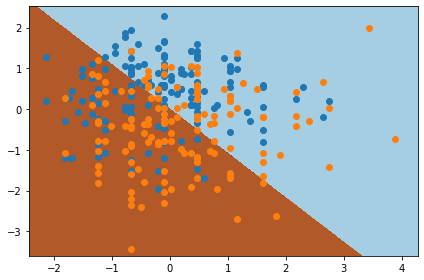

In [112]:
def visualize(data,labels, predictor):
    #pass
    #TODO
    min1, max1 = data[:, 0].min()-data[:, 0].min()*0.1, data[:, 0].max()+data[:, 0].max()*0.1
    min2, max2 = data[:, 1].min()-data[:, 1].min()*0.1, data[:, 1].max()+data[:, 1].max()*0.1
    x1grid = np.arange(min1-0.5, max1, np.abs(max1-min1)*0.001)
    x2grid = np.arange(min2-0.5, max2, np.abs(max2-min2)*0.001)
    xx, yy = np.meshgrid(x1grid, x2grid)
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    w_hat = 1
    yhat = np.round(predictor.predict(grid, w_hat))
    zz = yhat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='Paired')
    for class_value in np.unique(labels):
        row_ix = np.where(labels == class_value)
        plt.scatter(data[row_ix, 0], data[row_ix, 1], cmap='Paired')
    plt.tight_layout()
visualize(data, labels, lr_poly3)